TEAM MEMBERS: BILL KISUYA, JOAN NJOROGE, BRENDA MUTAI, BRIAN NGENY, JEFF KIARIE & IVAN KIBET.

# 1.Introduction

Vehicle accidents are a major source of worry for public safety and transportation agencies. They not only cause death and property damage, but also interrupt traffic flow and incur economic losses. Understanding the factors that contribute to these collisions and their effects is critical for putting effective measures in place to decrease their occurrence and impact.

The City of Chicago has collected extensive crash data through its electronic crash reporting system (E-Crash), providing a valuable resource to analyse and gain insights into the factors contributing to accidents. The dataset comprises a wide range of crash parameters, including crash circumstances, vehicles involved, and people affected.

The goal of this study is to analyse the dataset and provide a full understanding of car crashes and their characteristics in the city of Chicago. We hope to discover key factors that contribute to collisions, measure the impact they have, and analyse the circumstances surrounding the accidents by studying the numerous characteristics associated with each crash event.

This project's target audience includes numerous road safety stakeholders such as transportation authorities, law enforcement agencies, policymakers, and insurance companies. Decision-makers can establish focused plans and activities to reduce the frequency and severity of accidents by knowing the fundamental elements that contribute to collisions.

# 2. Business Understanding

The city of Chicago maintains an electronic crash reporting system (E-Crash) which shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD). Data from the CPD's electronic crash reporting system (E-Crash) are displayed without any identifying information. When a crash report is completed or when an existing report in E-Crash receives updates, records are added to the data portal. The drivers involved in most minor incidents self-report about half of all crash reports to the police station, while the other half are documented on the scene by the responding police officer. The reporting officer records several crash parameters, such as information on street conditions, weather, and posted speed restrictions, based on the best information at the moment, but many of these may conflict with posted data or other assessments of road conditions.

The dataset offers useful information for evaluating traffic incidents, spotting patterns, and putting safety measures in place to lower casualties and improve road safety. This information can be used by researchers, decision-makers, and analysts to make more informed choices and enhance overall road transportation systems. The goal of this research is to create a categorization model that will aid in determining the characteristics of an automobile collision that are significant.

# 3.Problem statement

Traffic accidents occur due to various factors, including vehicle characteristics, driver behavior, road conditions, weather, and traffic patterns. The Vehicle Safety Board and the City of Chicago who are the stakeholder recognize the importance of identifying and understanding the various factors leading to the accidents in order to implement targeted safety interventions and improve overall road safety.
From the several factors our primary objective that we aim to achieve are:
 
* To develop a model that can accurately determine the primary cause of car accidents by utilizing data, on vehicles, individuals and road conditions
*  To recommend to the City of Chicago Department of Transportation proactive measures to mitigate the risks, injuries and enhance overall road safety.

# 4.Data Understanding

We will make use of datasets from the Chicago Data Portal, an open data resource where one may find relevant information about the city. In particular we will be focusing on three datasets:
1. Traffic Crashes - Vehicles
2. Traffic Crashes - People 
3. Traffic Crashes - Crashes. 

The full description of the columns can be found in the data_description.md file.

Insights:
Drivers are more prone to be affected with the accidents with 731 cases.
Most victims are Males.
The most affected age group is between 26-30.

# 5.Data Cleaning

In [49]:
# Import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [50]:
# Set display options for pandas
pd.set_option('display.max_columns', None)
# Load data from CSV files into dataframes
crash = pd.read_csv('https://data.cityofchicago.org/resource/85ca-t3if.csv')
vehicle = pd.read_csv('https://data.cityofchicago.org/resource/68nd-jvt3.csv')
person = pd.read_csv('https://data.cityofchicago.org/resource/u6pd-qa9d.csv')

In [51]:
#(feature engineering)
# merging all three databases into 1, observing shape and previewing data 
merged = pd.merge(left=crash, right = vehicle, left_on='crash_record_id', right_on="crash_record_id")
df = pd.merge(left=merged, right=person, left_on = 'vehicle_id', right_on='vehicle_id')
# Display the shape and a preview of the merged dataframe
print(df.shape)
df.head()

(1483, 149)


,crash_record_id_x,rd_no_x,crash_date_est_i,crash_date_x,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,private_property_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,crash_unit_id,rd_no_y,crash_date_y,unit_no,unit_type,num_passengers,vehicle_id,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,crash_record_id_y,rd_no,crash_date,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result_value,cell_phone_use
0,b3235541759a29563e1f11d164de82b3b82ab366e5477d...,NaN,NaN,2023-08-06T22:05:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",2023-08-06T22:30:00.000,FOLLOWING TOO CLOSELY,NOT APPLICABLE,4300,W,IRVING PARK RD,1722,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0,0,0,0,0,2,0,22,1,8,41.953668,-87.735508,POINT (-87.735507825353 41.953667894495),1633936,NaN,2023-08-06T22:05:00.000,1,DRIVER,NaN,1554848.0,NaN,JEEP,COMPASS,IL,2018.0,UNKNOWN,SPORT UTILITY VEHICLE (SUV),PERSONAL,W,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O1633936,DRIVER,b3235541759a29563e1f11d164de82b3b82ab366e5477d...,NaN,2023-08-06T22:05:00.000,NaN,CHICAGO,IL,60641.0,M,0.0,IL,D,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,FOLLOWED TOO CLOSELY,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,b3235541759a29563e1f11d164de82b3b82ab366e5477d...,NaN,NaN,2023-08-06T22:05:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",2023-08-06T22:30:00.000,FOLLOWING TOO CLOSELY,NOT APPLICABLE,4300,W,IRVING PARK RD,1722,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0,0,0,0,0,2,0,22,1,8,41.953668,-87.735508,POINT (-87.735507825353 41.953667894495),1633937,NaN,2023-08-06T22:05:00.000,2,DRIVER,NaN,1554864.0,NaN,HONDA,ODYSSEY,IL,2005.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,W,SLOW/STOP IN TRAFFIC,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,REAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [52]:
# dropping redundant columns, previewing shape, data and info 
drop = ['crash_record_id_x', 'crash_date_x', 'alignment', 'intersection_related_i', 'sec_contributory_cause',
        'num_units','crash_unit_id', 'vehicle_id', 'person_id', "crash_record_id_y", 'street_no', 'street_direction',
       'street_name', 'location', 'zipcode', 'crash_month', 'latitude', 'longitude', 'crash_date_y', 'unit_no',
       'model', 'vehicle_year', 'vehicle_use', 'travel_direction', 'maneuver', 'occupant_cnt', 'first_contact_point',
       'lic_plate_state', 'city']
cleaned_df = df.drop(columns=drop)
print(cleaned_df.shape)
display(cleaned_df.head())
cleaned_df.info()

(1483, 120)


,rd_no_x,crash_date_est_i,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,roadway_surface_cond,road_defect,report_type,crash_type,private_property_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,rd_no_y,unit_type,num_passengers,cmrc_veh_i,make,vehicle_defect,vehicle_type,towed_i,fire_i,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_type,rd_no,crash_date,seat_no,state,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result_value,cell_phone_use
0,NaN,NaN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"OVER $1,500",2023-08-06T22:30:00.000,FOLLOWING TOO CLOSELY,1722,NaN,NaN,NaN,NaN,NaN,NaN,NO INDICATION OF INJURY,0,0,0,0,0,2,0,22,1,NaN,DRIVER,NaN,NaN,JEEP,UNKNOWN,SPORT UTILITY VEHICLE (SUV),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DRIVER,NaN,2023-08-06T22:05:00.000,NaN,IL,M,0.0,IL,D,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,FOLLOWED TOO CLOSELY,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,NaN,NaN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,NaN,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"OVER $1,500",2023-08-06T22:30:00.000,FOLLOWING TOO CLOSELY,1722,NaN,NaN,NaN,NaN,NaN,NaN,NO INDICATION OF INJURY,0,0,0,0,0,2,0,22,1,NaN,DRIVER,NaN,NaN,HONDA,NONE,SPORT UTILITY VEHICLE (SUV),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DRIVER,NaN,2023-08-06T22:05:00.000,NaN,IL,M,57.0,IL,D,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,NaN,NaN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,NaN,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,"OVER $1,500",2023-08-06T21:46:00.000,UNABLE TO DETERMINE,612,NaN,NaN,NaN,NaN,NaN,NaN,NO INDICATION OF INJURY,0,0,0,0,0,3,0,21,1,NaN,DRIVER,1.0,NaN,KIA,NONE,PASSENGER,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DRIVER,NaN,2023-08-06T21:46:00.000,NaN,IL,F,53.0,IL,D,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,NaN,NaN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, L

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Columns: 120 entries, rd_no_x to cell_phone_use
dtypes: float64(30), int64(11), object(79)
memory usage: 1.4+ MB


In [53]:
# calculating nulls percentage
nulls = cleaned_df.isna().sum()
# Calculate the percentage of null values for columns with missing data
null_percent = nulls[nulls>0] / len(df)
# extracting columns with excesssive nulls which is set at 95%
Index_label = null_percent[null_percent>.70].index.tolist()
Index_label[:7]


['rd_no_x',
 'crash_date_est_i',
 'lane_cnt',
 'private_property_i',
 'photos_taken_i',
 'statements_taken_i',
 'dooring_i']

In [54]:
# previewing shape, data and info 
cleaned_df2 = cleaned_df.drop(columns = Index_label)
print(cleaned_df2.shape)
display(cleaned_df2.head())
cleaned_df2.info()

(1483, 46)


,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,report_type,crash_type,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,beat_of_occurrence,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,unit_type,make,vehicle_defect,vehicle_type,person_type,crash_date,state,sex,age,safety_equipment,airbag_deployed,ejection,injury_classification,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result
0,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,"OVER $1,500",2023-08-06T22:30:00.000,FOLLOWING TOO CLOSELY,1722,NO INDICATION OF INJURY,0,0,0,0,0,2,0,22,1,DRIVER,JEEP,UNKNOWN,SPORT UTILITY VEHICLE (SUV),DRIVER,2023-08-06T22:05:00.000,IL,M,0.0,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,FOLLOWED TOO CLOSELY,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,"OVER $1,500",2023-08-06T22:30:00.000,FOLLOWING TOO CLOSELY,1722,NO INDICATION OF INJURY,0,0,0,0,0,2,0,22,1,DRIVER,HONDA,NONE,SPORT UTILITY VEHICLE (SUV),DRIVER,2023-08-06T22:05:00.000,IL,M,57.0,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED
2,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,"OVER $1,500",2023-08-06T21:46:00.000,UNABLE TO DETERMINE,612,NO INDICATION OF INJURY,0,0,0,0,0,3,0,21,1,DRIVER,KIA,NONE,PASSENGER,DRIVER,2023-08-06T21:46:00.000,IL,F,53.0,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,UNKNOWN,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,"OVER $1,500",2023-08-06T21:46:00.000,UNABLE TO DETERMINE,612,NO INDICATION OF INJURY,0,0,0,0,0,3,0,21,1,DRIVER,KIA,NONE,PASSENGER,PASSENGER,2023-08-06T21:46:00.000,IL,F,48.0,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,"OVER $1,500",2023-08-06T21:46:00.000,UNABLE TO DETERMINE,612,NO INDICATION OF INJURY,0,0,0,0,0,3,0,21,1,DRIVER,BUICK,NONE,PASSENGER,DRIVER,2023-08-06T21:46:00.000,IL,F,29.0,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posted_speed_limit             1483 non-null   int64  
 1   traffic_control_device         1483 non-null   object 
 2   device_condition               1483 non-null   object 
 3   weather_condition              1483 non-null   object 
 4   lighting_condition             1483 non-null   object 
 5   first_crash_type               1483 non-null   object 
 6   trafficway_type                1483 non-null   object 
 7   roadway_surface_cond           1483 non-null   object 
 8   road_defect                    1483 non-null   object 
 9   report_type                    1478 non-null   object 
 10  crash_type                     1483 non-null   object 
 11  hit_and_run_i                  548 non-null    object 
 12  damage                         1483 non-null   o

In [55]:
# previewing shape, data and info 
df = df.drop(columns = Index_label)
print(df.shape)
# Display the first few rows of the cleaned DataFrame
display(df.head())
# Display information about the DataFrame's columns and non-null counts
df.info()

(1483, 75)


,crash_record_id_x,crash_date_x,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,crash_unit_id,crash_date_y,unit_no,unit_type,vehicle_id,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,occupant_cnt,first_contact_point,person_id,person_type,crash_record_id_y,crash_date,city,state,zipcode,sex,age,safety_equipment,airbag_deployed,ejection,injury_classification,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result
0,b3235541759a29563e1f11d164de82b3b82ab366e5477d...,2023-08-06T22:05:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"OVER $1,500",2023-08-06T22:30:00.000,FOLLOWING TOO CLOSELY,NOT APPLICABLE,4300,W,IRVING PARK RD,1722,2,NO INDICATION OF INJURY,0,0,0,0,0,2,0,22,1,8,41.953668,-87.735508,POINT (-87.735507825353 41.953667894495),1633936,2023-08-06T22:05:00.000,1,DRIVER,1554848.0,JEEP,COMPASS,IL,2018.0,UNKNOWN,SPORT UTILITY VEHICLE (SUV),PERSONAL,W,STRAIGHT AHEAD,1.0,FRONT,O1633936,DRIVER,b3235541759a29563e1f11d164de82b3b82ab366e5477d...,2023-08-06T22:05:00.000,CHICAGO,IL,60641.0,M,0.0,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,FOLLOWED TOO CLOSELY,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED
1,b3235541759a29563e1f11d164de82b3b82ab366e5477d...,2023-08-06T22:05:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,"OVER $1,500",2023-08-06T22:30:00.000,FOLLOWING TOO CLOSELY,NOT APPLICABLE,4300,W,IRVING PARK RD,1722,2,NO INDICATION OF INJURY,0,0,0,0,0,2,0,22,1,8,41.953668,-87.735508,POINT (-87.735507825353 41.953667894495),1633937,2023-08-06T22:05:00.000,2,DRIVER,1554864.0,HONDA,ODYSSEY,IL,2005.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,W,SLOW/STOP IN TRAFFIC,1.0,REAR,O1633937,DRIVER,b3235541759a29563e1f11d164de82b3b82ab366e5477d...,2023-08-06T22:05:00.000,CHICAGO,IL,60634.0,M,57.0,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED
2,49bc94e87a5392c517b613490383374bec0d76c7d4e283...,2023-08-06T21:46:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,Y,NaN,"OVER $1,500",2023-08-06T21:46:00.000,UNABLE TO DETERMINE,UNABLE TO DETERMINE,7900,S,RACINE AVE,612,2,NO INDICATION OF INJURY,0,0,0,0,0,3,0,21,1,8,41.750475,-87.653883,POINT (-87.653883334391 41.750474929778),1633919,2023-08-06T21:46:00.000,1,DRIVER,1554825.0,KIA,OPTIMA / K5,IL,2022.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,2.0,FRONT,O1633919,DRIVER,49bc94e87a5392c517b613490383374bec0d76c7d4e283...,2023-08-06T21:46:00.000,CHICAGO,IL,60620.0,F,53.0,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,UNKNOWN,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED
3,49bc94e87a5392c517b613490383374bec0d76c7d4e283...,2023-08-06T21:46:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,Y,NaN,"OVER $1,500",2023-08-06T21:46:00.000,UNABLE TO DETERMINE,UNABLE TO DETERMINE,7900,S,RACINE AVE,612,2,NO INDICATION OF INJURY,0,0,0,0,0,3,0,21,1,8,41.750475,-87.653883,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crash_record_id_x              1483 non-null   object 
 1   crash_date_x                   1483 non-null   object 
 2   posted_speed_limit             1483 non-null   int64  
 3   traffic_control_device         1483 non-null   object 
 4   device_condition               1483 non-null   object 
 5   weather_condition              1483 non-null   object 
 6   lighting_condition             1483 non-null   object 
 7   first_crash_type               1483 non-null   object 
 8   trafficway_type                1483 non-null   object 
 9   alignment                      1483 non-null   object 
 10  roadway_surface_cond           1483 non-null   object 
 11  road_defect                    1483 non-null   object 
 12  report_type                    1478 non-null   o

### 5.1.Dropping Irrelevant Columns

In [56]:
# dropping following columns due to irrelevance in predicting the cause of car accidents 
# irrelevent columns were dropped due to column description
columns = ['report_type', 'crash_type', 'bac_result', 'date_police_notified',
        'injuries_incapacitating', 'most_severe_injury','injuries_non_incapacitating',
        'injuries_reported_not_evident', 'injuries_no_indication', 'injuries_unknown', 'crash_date',
        'crash_date', 'ejection','beat_of_occurrence']

cleaned_df3 = cleaned_df2.drop(columns = columns)
print(cleaned_df3.shape)
cleaned_df3.head()

(1483, 33)


,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,damage,prim_contributory_cause,injuries_total,injuries_fatal,crash_hour,crash_day_of_week,unit_type,make,vehicle_defect,vehicle_type,person_type,state,sex,age,safety_equipment,airbag_deployed,injury_classification,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location
0,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,DRY,NO DEFECTS,NaN,"OVER $1,500",FOLLOWING TOO CLOSELY,0,0,22,1,DRIVER,JEEP,UNKNOWN,SPORT UTILITY VEHICLE (SUV),DRIVER,IL,M,0.0,USAGE UNKNOWN,NOT APPLICABLE,NO INDICATION OF INJURY,FOLLOWED TOO CLOSELY,UNKNOWN,UNKNOWN,NaN,NaN,NaN
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,DRY,NO DEFECTS,NaN,"OVER $1,500",FOLLOWING TOO CLOSELY,0,0,22,1,DRIVER,HONDA,NONE,SPORT UTILITY VEHICLE (SUV),DRIVER,IL,M,57.0,USAGE UNKNOWN,NOT APPLICABLE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN
2,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,DRY,NO DEFECTS,NaN,"OVER $1,500",UNABLE TO DETERMINE,0,0,21,1,DRIVER,KIA,NONE,PASSENGER,DRIVER,IL,F,53.0,USAGE UNKNOWN,DID NOT DEPLOY,NO INDICATION OF INJURY,UNKNOWN,NOT OBSCURED,NORMAL,NaN,NaN,NaN
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,DRY,NO DEFECTS,NaN,"OVER $1,500",UNABLE TO DETERMINE,0,0,21,1,DRIVER,KIA,NONE,PASSENGER,PASSENGER,IL,F,48.0,USAGE UNKNOWN,NOT APPLICABLE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,DRY,NO DEFECTS,NaN,"OVER $1,500",UNABLE TO DETERMINE,0,0,21,1,DRIVER,BUICK,NONE,PASSENGER,DRIVER,IL,F,29.0,USAGE UNKNOWN,NOT APPLICABLE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN


In [57]:
cleaned_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   posted_speed_limit       1483 non-null   int64  
 1   traffic_control_device   1483 non-null   object 
 2   device_condition         1483 non-null   object 
 3   weather_condition        1483 non-null   object 
 4   lighting_condition       1483 non-null   object 
 5   first_crash_type         1483 non-null   object 
 6   trafficway_type          1483 non-null   object 
 7   roadway_surface_cond     1483 non-null   object 
 8   road_defect              1483 non-null   object 
 9   hit_and_run_i            548 non-null    object 
 10  damage                   1483 non-null   object 
 11  prim_contributory_cause  1483 non-null   object 
 12  injuries_total           1483 non-null   int64  
 13  injuries_fatal           1483 non-null   int64  
 14  crash_hour              

In [58]:
missing_values = cleaned_df3.isnull().sum()
missing_values

posted_speed_limit           0
traffic_control_device       0
device_condition             0
weather_condition            0
lighting_condition           0
first_crash_type             0
trafficway_type              0
roadway_surface_cond         0
road_defect                  0
hit_and_run_i              935
damage                       0
prim_contributory_cause      0
injuries_total               0
injuries_fatal               0
crash_hour                   0
crash_day_of_week            0
unit_type                    0
make                       676
vehicle_defect             676
vehicle_type               676
person_type                  0
state                      327
sex                         30
age                        286
safety_equipment           130
airbag_deployed            676
injury_classification        0
driver_action              308
driver_vision              386
physical_condition         256
pedpedal_action            807
pedpedal_visibility        807
pedpedal

### 5.2.Cleaning categorical data

In [59]:
object_columns = list(cleaned_df3.select_dtypes(include=['object']).columns)
for col in object_columns:
    cleaned_df3[col] = cleaned_df3[col].fillna('missing')

object_columns

['traffic_control_device',
 'device_condition',
 'weather_condition',
 'lighting_condition',
 'first_crash_type',
 'trafficway_type',
 'roadway_surface_cond',
 'road_defect',
 'hit_and_run_i',
 'damage',
 'prim_contributory_cause',
 'unit_type',
 'make',
 'vehicle_defect',
 'vehicle_type',
 'person_type',
 'state',
 'sex',
 'safety_equipment',
 'airbag_deployed',
 'injury_classification',
 'driver_action',
 'driver_vision',
 'physical_condition',
 'pedpedal_action',
 'pedpedal_visibility',
 'pedpedal_location']

In [60]:
# objects in the dataset
objects_df = cleaned_df3.select_dtypes(include = object)
objects_df

,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,damage,prim_contributory_cause,unit_type,make,vehicle_defect,vehicle_type,person_type,state,sex,safety_equipment,airbag_deployed,injury_classification,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location
0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,DRY,NO DEFECTS,missing,"OVER $1,500",FOLLOWING TOO CLOSELY,DRIVER,JEEP,UNKNOWN,SPORT UTILITY VEHICLE (SUV),DRIVER,IL,M,USAGE UNKNOWN,NOT APPLICABLE,NO INDICATION OF INJURY,FOLLOWED TOO CLOSELY,UNKNOWN,UNKNOWN,missing,missing,missing
1,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,DRY,NO DEFECTS,missing,"OVER $1,500",FOLLOWING TOO CLOSELY,DRIVER,HONDA,NONE,SPORT UTILITY VEHICLE (SUV),DRIVER,IL,M,USAGE UNKNOWN,NOT APPLICABLE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,missing,missing,missing
2,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,DRY,NO DEFECTS,missing,"OVER $1,500",UNABLE TO DETERMINE,DRIVER,KIA,NONE,PASSENGER,DRIVER,IL,F,USAGE UNKNOWN,DID NOT DEPLOY,NO INDICATION OF INJURY,UNKNOWN,NOT OBSCURED,NORMAL,missing,missing,missing
3,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,DRY,NO DEFECTS,missing,"OVER $1,500",UNABLE TO DETERMINE,DRIVER,KIA,NONE,PASSENGER,PASSENGER,IL,F,USAGE UNKNOWN,NOT APPLICABLE,NO INDICATION OF INJURY,missing,missing,missing,missing,missing,missing
4,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,DRY,NO DEFECTS,missing,"OVER $1,500",UNABLE TO DETERMINE,DRIVER,BUICK,NONE,PASSENGER,DRIVER,IL,F,USAGE UNKNOWN,NOT APPLICABLE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,missing,missing,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,WET,NO DEFECTS,missing,"OVER $1,500",FOLLOWING TOO CLOSELY,DRIVER,HYUNDAI,UNKNOWN,PASSENGER,PASSENGER,missing,M,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,missing,missing,missing,missing,missing,missing
1479,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,WET,NO DEFECTS,missing,"OVER $1,500",FOLLOWING TOO CLOSELY,DRIVER,MINI,UNKNOWN,PASSENGER,DRIVER,IL,M,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,missing,missing,missing
1480,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,WET,NO DEFECTS,missing,"OVER $1,500",FOLLOWING TOO CLOSELY,DRIVER,MINI,UNKNOWN,PASSENGER,PASSENGER,IL,F,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,missing,missing,missing,missing,missing,missing
1481,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,WET,NO DEFECTS,missing,"OVER $1,500",IMPROPER OVERTAKING/PASSING,DRIVER,NISSAN,NONE,PASSENGER,DRIVER,IL,F,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,IMPROPER PASSING,OTHER,UNKNOWN,missing,missing,missing


In [61]:
# find unique varibles and null values in the categorical data
for column in objects_df.columns:
    print(f"COLUMN name: '{column}'")
    print(f"No. of unique values: {len(objects_df[column].unique())}")
    print(f"No. of null values: {objects_df[column].isnull().sum()}")
    print(f"% of null values: {(objects_df[column].isnull().sum() / len(objects_df[column]) * 100) }")
    print(objects_df[column].value_counts(normalize=True))
    print()

COLUMN name: 'traffic_control_device'
No. of unique values: 6
No. of null values: 0
% of null values: 0.0
traffic_control_device
NO CONTROLS           0.510452
TRAFFIC SIGNAL        0.317599
UNKNOWN               0.097100
STOP SIGN/FLASHER     0.070128
OTHER                 0.002697
OTHER WARNING SIGN    0.002023
Name: proportion, dtype: float64

COLUMN name: 'device_condition'
No. of unique values: 7
No. of null values: 0
% of null values: 0.0
device_condition
NO CONTROLS               0.520566
FUNCTIONING PROPERLY      0.345920
UNKNOWN                   0.126770
FUNCTIONING IMPROPERLY    0.002697
MISSING                   0.001349
OTHER                     0.001349
NOT FUNCTIONING           0.001349
Name: proportion, dtype: float64

COLUMN name: 'weather_condition'
No. of unique values: 6
No. of null values: 0
% of null values: 0.0
weather_condition
RAIN                     0.549562
CLEAR                    0.268375
CLOUDY/OVERCAST          0.097775
UNKNOWN                  0.074174


In [62]:
integer_columns = list(cleaned_df3.select_dtypes(include=['float','int64']).columns)
for col in integer_columns:
    median_age = df[col].median()
    # Replace null values in the  column with the median
    cleaned_df3[col] = cleaned_df3[col].fillna(median_age)
    

In [63]:
columns_with_nulls = cleaned_df3.columns[cleaned_df3.isnull().any()]
columns_with_nulls

Index([], dtype='object')

# 6.Exploratory Analysis

### Univariate Analysis

In [64]:
# List of numerical columns for univariate analysis
numerical_columns = list(cleaned_df3.select_dtypes(include=['float', 'int64']).columns)

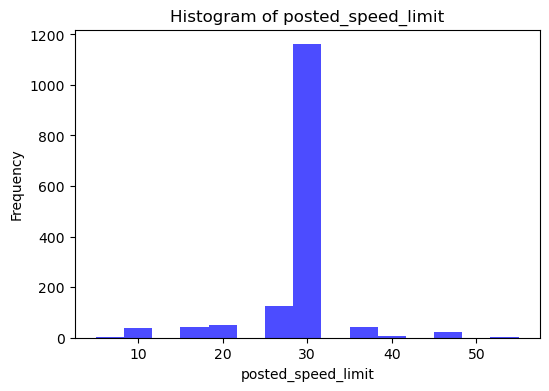

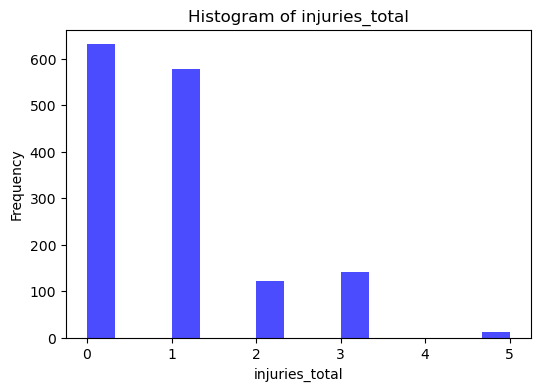

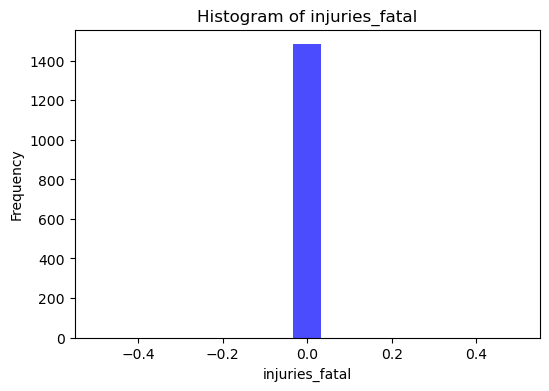

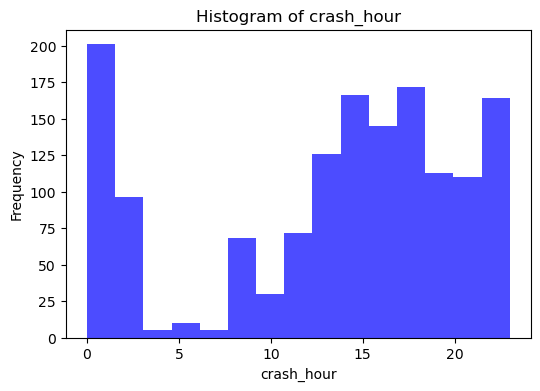

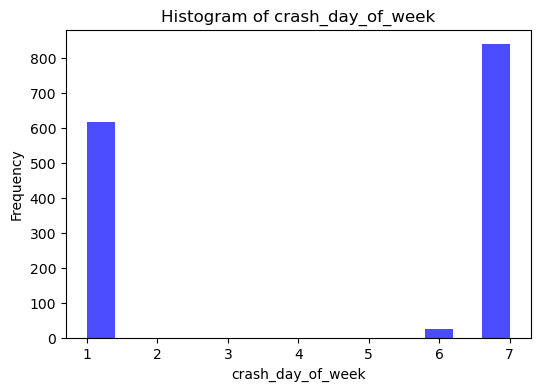

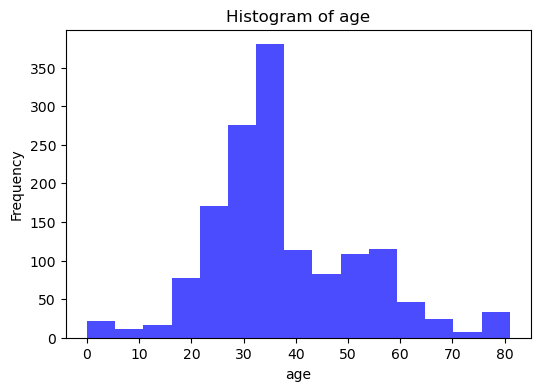

In [67]:
# Histograms for numerical variables
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(cleaned_df3[col], bins=15, color='blue', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

In [ ]:
# Percentage distribution for categorical variables
for col in categorical_columns:
    percentage_distribution = cleaned_df3[col].value_counts(normalize=True) * 100
    print(f'Percentage Distribution of {col}:')
    print(percentage_distribution)
    print()


Percentage Distribution of traffic_control_device:
traffic_control_device
NO CONTROLS           51.045179
TRAFFIC SIGNAL        31.759946
UNKNOWN                9.710047
STOP SIGN/FLASHER      7.012812
OTHER                  0.269724
OTHER WARNING SIGN     0.202293
Name: proportion, dtype: float64

Percentage Distribution of device_condition:
device_condition
NO CONTROLS               52.056642
FUNCTIONING PROPERLY      34.592043
UNKNOWN                   12.677006
FUNCTIONING IMPROPERLY     0.269724
MISSING                    0.134862
OTHER                      0.134862
NOT FUNCTIONING            0.134862
Name: proportion, dtype: float64

Percentage Distribution of weather_condition:
weather_condition
RAIN                     54.956170
CLEAR                    26.837492
CLOUDY/OVERCAST           9.777478
UNKNOWN                   7.417397
FREEZING RAIN/DRIZZLE     0.674309
OTHER                     0.337154
Name: proportion, dtype: float64

Percentage Distribution of lighting_conditio

### Bivariate Analysis

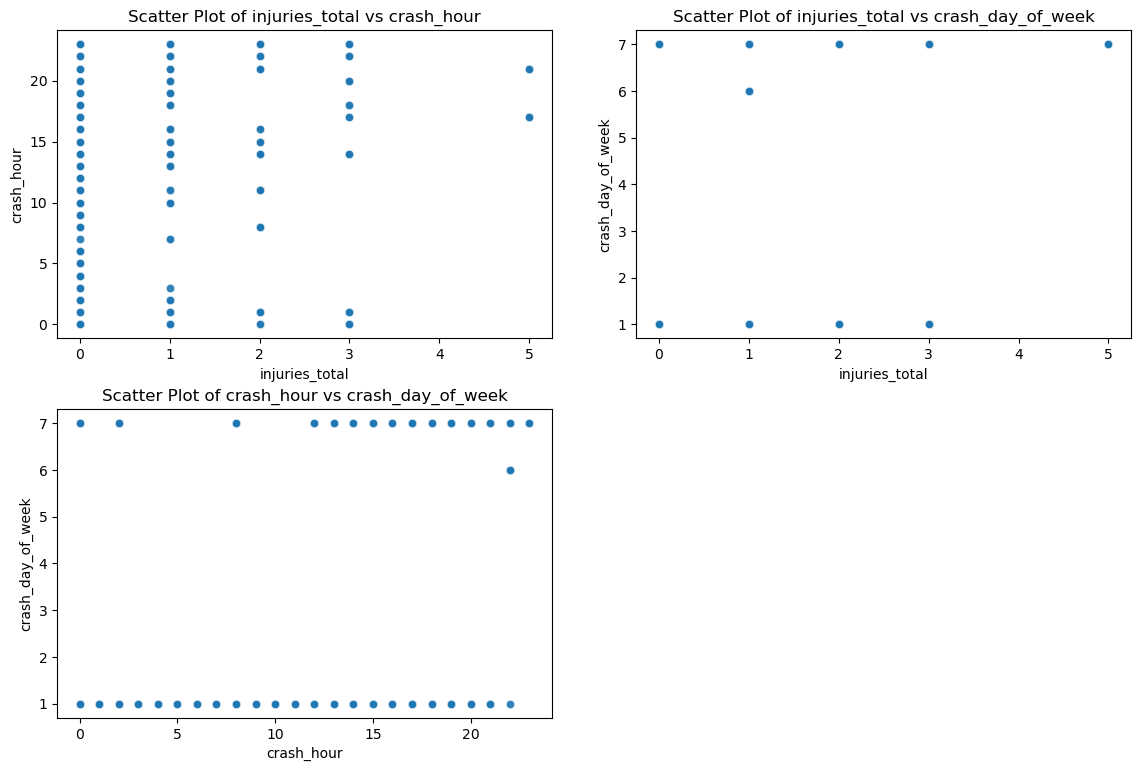

In [68]:
# List of numeric columns for bivariate analysis
numeric_columns = list(cleaned_df3.select_dtypes(include=['float', 'int64']).columns)

# Select a subset of significant numeric columns for analysis
significant_numeric_columns = ['injuries_total', 'crash_hour', 'crash_day_of_week']

# Calculate the number of rows and columns for subplots
num_rows = (len(significant_numeric_columns) + 1) // 2
num_cols = 2

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.tight_layout(pad=3.0)

# Plot scatter plots for selected pairs of numeric variables
for i, col1 in enumerate(significant_numeric_columns):
    for j, col2 in enumerate(significant_numeric_columns):
        if j <= i:  # Only plot lower triangle
            continue
        
        row = i
        col = j - i - 1
        ax = axes[row, col]
        
        sns.scatterplot(data=cleaned_df3, x=col1, y=col2, ax=ax, alpha=0.7)
        ax.set_title(f'Scatter Plot of {col1} vs {col2}')
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)

# Remove any empty subplots
for i in range(len(significant_numeric_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

### Multivariate Analysis

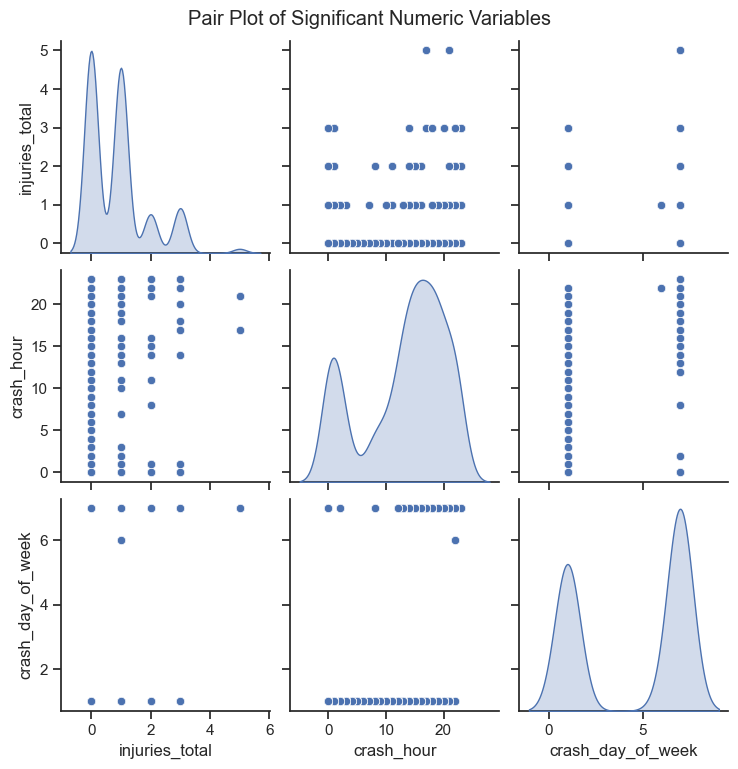

In [69]:


# List of numeric columns for multivariate analysis
numeric_columns = list(cleaned_df3.select_dtypes(include=['float', 'int64']).columns)

# Select a subset of significant numeric columns for analysis
significant_numeric_columns = ['injuries_total', 'crash_hour', 'crash_day_of_week']

# Create a pair plot
sns.set(style="ticks")
pair_plot = sns.pairplot(cleaned_df3[significant_numeric_columns], diag_kind='kde')
pair_plot.fig.suptitle("Pair Plot of Significant Numeric Variables", y=1.02)

plt.show()


In summary, the exploratory data analysis provided insights into the distribution of individual variables, relationships between pairs of variables, and more complex interactions involving multiple variables. This analysis is crucial for gaining a deeper understanding of the dataset, identifying patterns, and informing further steps in the data analysis process.

# 7. Modeling

### Model1

### Model2

### Model3

### Model4

### Model5

### Model6

# 8. Conclusions

# 9.Recommendations